In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression 
import missingno as msno
from sklearn.preprocessing import OrdinalEncoder
import datetime
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
df=pd.read_csv('customer-data.csv')

1. Demographic Variables:

    - cust_age: Customer age
    - cust_income: Customer annual gross income
    - cust_profession: Customer profession category
    - gender: Customer gender
    - hhld_size: Customer household size
    - marital_status: Customer marital status
    - residence_status: Customer residence category
    - state: State where the customer resides
 
 
2. Customer Engagement Variables:

    - days_since_last_visit: Days since the customer's last visit to JCD
    - months_since_first_purch: Months since the customer's first purchase from JCD
    - response_flag: Response flag (1 if the customer responded to a promotion in the last 12 months, 0 otherwise)


3. Purchase Behavior Variables:

    - num_apparel_L6M: Number of apparel purchases in the last 6 months
    - num_elec_L6M: Number of electronics purchases in the last 6 months
    - num_haba_L6M: Number of health and beauty purchases in the last 6 months
    - num_hw_L6M: Number of housewares purchases in the last 6 months
    - total_num_purch_L6M: Total number of purchases in the last 6 months (sum of the previous 4 variables)


4. Spending Variables:

    - dollars_apparel_L6M: Total dollars spent on apparel in the last 6 months
    - dollars_elec_L6M: Total dollars spent on electronics in the last 6 months
    - dollars_haba_L6M: Total dollars spent on health & beauty in the last 6 months
    - dollars_hw_L6M: Total dollars spent on housewares in the last 6 months
    - total_dollars_L6M: Total dollars spent on all categories in the last 6 months (sum of the previous 4 variables)


5. Profitability/Margin Variables:

    - basket_margin: Overall margin on all purchases made by the customer (in percentage points, e.g., 15 = 15%)
    - margin_hw: Margin on housewares purchases made by the customer (as a decimal, e.g., 0.15 = 15%)
    - margin_elec: Margin on electronics purchases made by the customer (as a decimal, e.g., 0.15 = 15%)
    - margin_haba: Margin on health & beauty purchases made by the customer (as a decimal, e.g., 0.15 = 15%)
    - margin_apparel: Margin on apparel purchases made by the customer (as a decimal, e.g., 0.15 = 15%)

The term "margin on apparel purchases made by the customer" refers to the profit percentage that JC Dollars earns from selling apparel items to a specific customer. The margin is expressed as a decimal, where 0.15 would represent a 15% profit margin.

In simpler terms, if a customer purchases an apparel item for $100, and JC Dollars has a margin of 15% (0.15) on that purchase, the company would make a profit of $15 from that sale ($100 * 0.15 = $15). The remaining $85 would cover the cost of the item and any associated expenses.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102539 entries, 0 to 102538
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   cust_id                   102539 non-null  int64  
 1   cust_age                  102539 non-null  int64  
 2   cust_income               95501 non-null   float64
 3   cust_profession           102539 non-null  object 
 4   gender                    102539 non-null  object 
 5   hhld_size                 102539 non-null  int64  
 6   marital_status            102539 non-null  object 
 7   residence_status          102539 non-null  object 
 8   state                     102539 non-null  object 
 9   response_flag             102539 non-null  int64  
 10  days_since_last_visit     102539 non-null  int64  
 11  months_since_first_purch  102539 non-null  int64  
 12  num_apparel_L6M           102539 non-null  int64  
 13  num_elec_L6M              102539 non-null  i

### '''Data preprocessing'''

In [4]:
df_clean = df.drop(columns=['cust_id','cust_income'])
df_clean = df_clean.dropna()#no nulls

In [5]:
#find duplicates
dups = df_clean.duplicated()
dups #no duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
102534    False
102535    False
102536    False
102537    False
102538    False
Length: 102539, dtype: bool

In [6]:
#get the column names of the dataset
df_clean.columns

Index(['cust_age', 'cust_profession', 'gender', 'hhld_size', 'marital_status',
       'residence_status', 'state', 'response_flag', 'days_since_last_visit',
       'months_since_first_purch', 'num_apparel_L6M', 'num_elec_L6M',
       'num_haba_L6M', 'num_hw_L6M', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'total_dollars_L6M', 'basket_margin', 'margin_hw',
       'margin_elec', 'margin_haba', 'margin_apparel'],
      dtype='object')

In [7]:
# Printing unique values for list of columns
# for each column
for col in ['cust_age', 'cust_profession', 'gender', 'hhld_size', 'marital_status',
       'residence_status', 'state', 'response_flag', 'days_since_last_visit',
       'months_since_first_purch', 'num_apparel_L6M', 'num_elec_L6M',
       'num_haba_L6M', 'num_hw_L6M', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'total_dollars_L6M', 'basket_margin', 'margin_hw',
       'margin_elec', 'margin_haba', 'margin_apparel']:
    print(col)

    # get a list of unique values
    unique = df_clean[col].unique()
    print('#.of unique values: ', len(unique), '\nList of unique values: ',unique, '\n*************************************\n')


cust_age
#.of unique values:  65 
List of unique values:  [28 54 39 40 38 51 43 44 50 49 36 35 48 32 45 42 46 41 47 37 34 55 53 29
 31 57 52 33 56 59 61 60 30 26 27 24 58 65 62 25 63 83 22 23 21 69 66 67
 20 64 19 70 68 75 72 73 77 74 76 71 80 82 81 78 79] 
*************************************

cust_profession
#.of unique values:  6 
List of unique values:  ['SELF EMPLOYED' 'HOMEMAKER' 'SALARIED' 'OTHER' 'UNEMPLOYED' 'STUDENT'] 
*************************************

gender
#.of unique values:  2 
List of unique values:  ['M' 'F'] 
*************************************

hhld_size
#.of unique values:  12 
List of unique values:  [12 10  7  6  5  4  3  2  1  9  8 13] 
*************************************

marital_status
#.of unique values:  4 
List of unique values:  ['Married' 'Divorced / Separated' 'Unknown' 'Single'] 
*************************************

residence_status
#.of unique values:  4 
List of unique values:  ['Rental' 'Other' 'Homeowners' 'Unknown'] 
********************

In [8]:
print("Total categories in the feature Marital_Status:\n", df_clean["marital_status"].value_counts(), "\n")
print("Total categories in the feature Customer Profession:\n", df_clean["cust_profession"].value_counts())
print("Total categories in the feature Residence Status:\n", df_clean["residence_status"].value_counts())
print("Total categories in the feature State:\n", df_clean["state"].value_counts())
print("Total categories in the feature Gender:\n", df_clean["gender"].value_counts())

Total categories in the feature Marital_Status:
 Married                 53281
Single                  35011
Divorced / Separated    10048
Unknown                  4199
Name: marital_status, dtype: int64 

Total categories in the feature Customer Profession:
 SALARIED         52729
SELF EMPLOYED    31323
HOMEMAKER         9989
OTHER             6398
UNEMPLOYED        1210
STUDENT            890
Name: cust_profession, dtype: int64
Total categories in the feature Residence Status:
 Homeowners    70952
Rental        14827
Unknown        8681
Other          8079
Name: residence_status, dtype: int64
Total categories in the feature State:
 NJ    14032
MA    11147
RI     9712
MD     9553
CT     8784
DE     7076
NY     6248
FL     4563
PA     4321
OH     4070
CA     3709
IL     3701
VA     2783
NC     2134
IN     1892
MI     1621
GA     1333
SC     1267
TN     1130
0       930
NH      840
KY      501
LA      464
WI      375
WA      353
Name: state, dtype: int64
Total categories in the feature 

In [9]:
#change categorical data to ordinal data
list(df_clean.select_dtypes(include='object'))
'''
['cust_profession', 'gender', 'marital_status', 'residence_status', 'state']
'''

"\n['cust_profession', 'gender', 'marital_status', 'residence_status', 'state']\n"

In [10]:
###state
# Create an instance of the ordinal encoder
encoder = OrdinalEncoder(categories=[['SC','RI','OH', 'MA', 'NJ', 'NY', 'IL', 'DE', 'MD', 'GA', 'KY', 'FL', 'PA', 'NC',
 'VA', 'CA', 'CT', '0', 'NH', 'TN', 'MI', 'IN', 'WA', 'WI', 'LA']])

# Fit and transform the categorical variable
encoded = encoder.fit_transform(df_clean[['state']])

# Replace the original categorical variable with the encoded values
df_clean['state'] = encoded.astype(int)

###cust_profession
encoder = OrdinalEncoder(categories=[['SELF EMPLOYED', 'HOMEMAKER', 'SALARIED', 'OTHER', 'UNEMPLOYED', 'STUDENT']])
encoded = encoder.fit_transform(df_clean[['cust_profession']])
df_clean['cust_profession'] = encoded.astype(int)

###marital status
encoder = OrdinalEncoder(categories=[['Married','Divorced / Separated','Unknown','Single']])
encoded = encoder.fit_transform(df_clean[['marital_status']])
df_clean['marital_status'] = encoded.astype(int)

###gender
encoder = OrdinalEncoder(categories=[['M','F']])
encoded = encoder.fit_transform(df_clean[['gender']])
df_clean['gender'] = encoded.astype(int)

###residence status
encoder = OrdinalEncoder(categories=[['Rental', 'Other', 'Homeowners', 'Unknown']])
encoded = encoder.fit_transform(df_clean[['residence_status']])
df_clean['residence_status'] = encoded.astype(int)


In [11]:
df_clean

,cust_age,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,days_since_last_visit,months_since_first_purch,...,dollars_apparel_L6M,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel
0,28,0,0,12,0,0,0,0,205,24,...,0,0,0,0,0,29.000,0.08,0.04,0.54,0.28
1,54,1,0,10,0,0,1,0,206,56,...,0,0,0,0,0,14.542,0.12,0.06,0.28,0.20
2,39,2,1,7,0,0,2,0,206,13,...,0,0,0,0,0,22.098,0.14,0.18,0.04,0.16
3,40,1,0,6,0,0,3,0,120,4,...,0,0,0,0,0,23.900,0.20,0.28,0.36,0.12
4,40,3,0,6,0,0,4,0,204,8,...,0,0,0,0,0,23.900,0.06,0.34,0.14,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102534,24,0,0,1,3,0,16,0,205,14,...,398,1398,1681,719,4196,13.946,0.22,0.08,0.54,0.12
102535,56,1,0,1,0,2,16,0,208,16,...,0,0,466,0,753,15.086,0.04,0.04,0.16,0.10
102536,58,1,0,1,1,2,16,0,207,15,...,0,0,201,2509,2718,7.904,0.26,0.12,0.52,0.06
102537,36,5,0,1,3,0,16,0,213,15,...,134,0,600,0,869,13.200,0.04,0.12,0.40,0.24


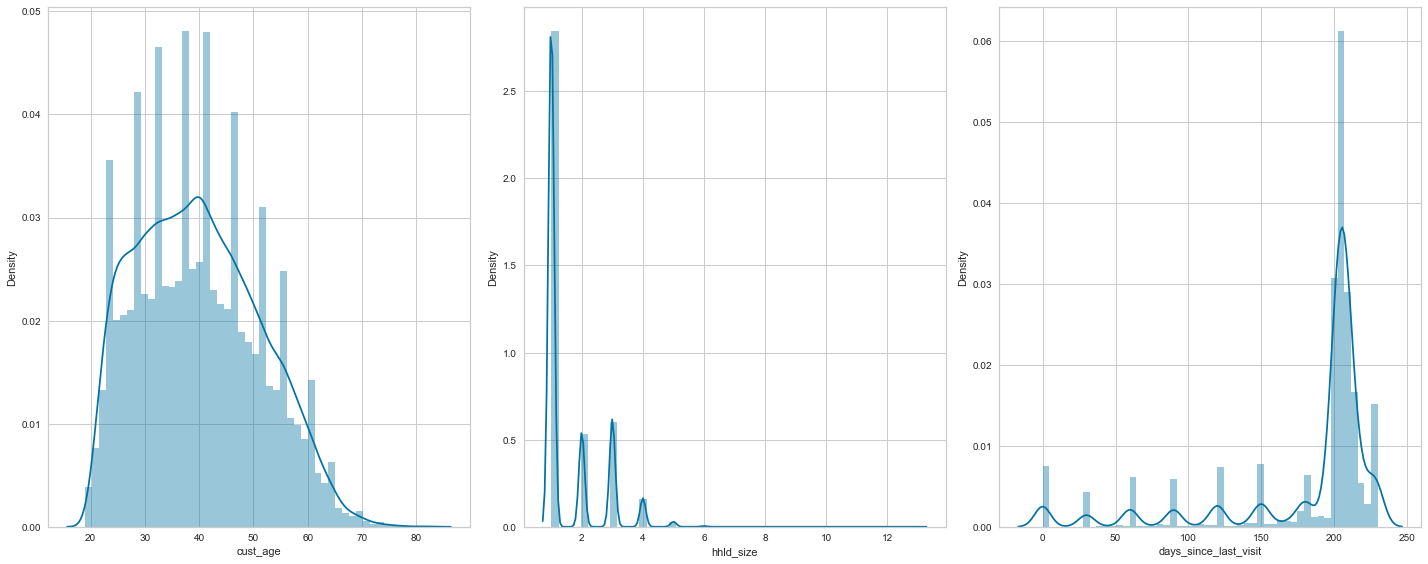

In [12]:
# distribution plots

plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['cust_age', 'hhld_size', 'days_since_last_visit','months_since_first_purch']:
    if plotnumber <= 3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

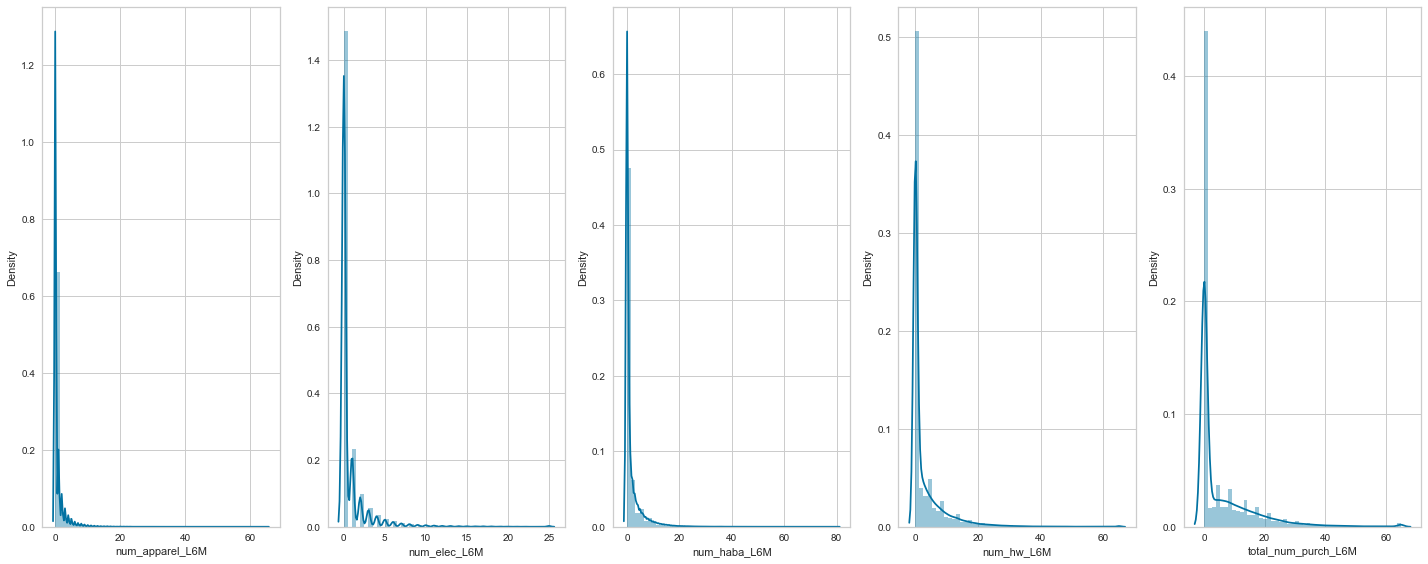

In [14]:

       
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['num_apparel_L6M', 'num_elec_L6M','num_haba_L6M', 'num_hw_L6M', 'total_num_purch_L6M',
       ]:
    if plotnumber <= 5:
        ax = plt.subplot(1, 5, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

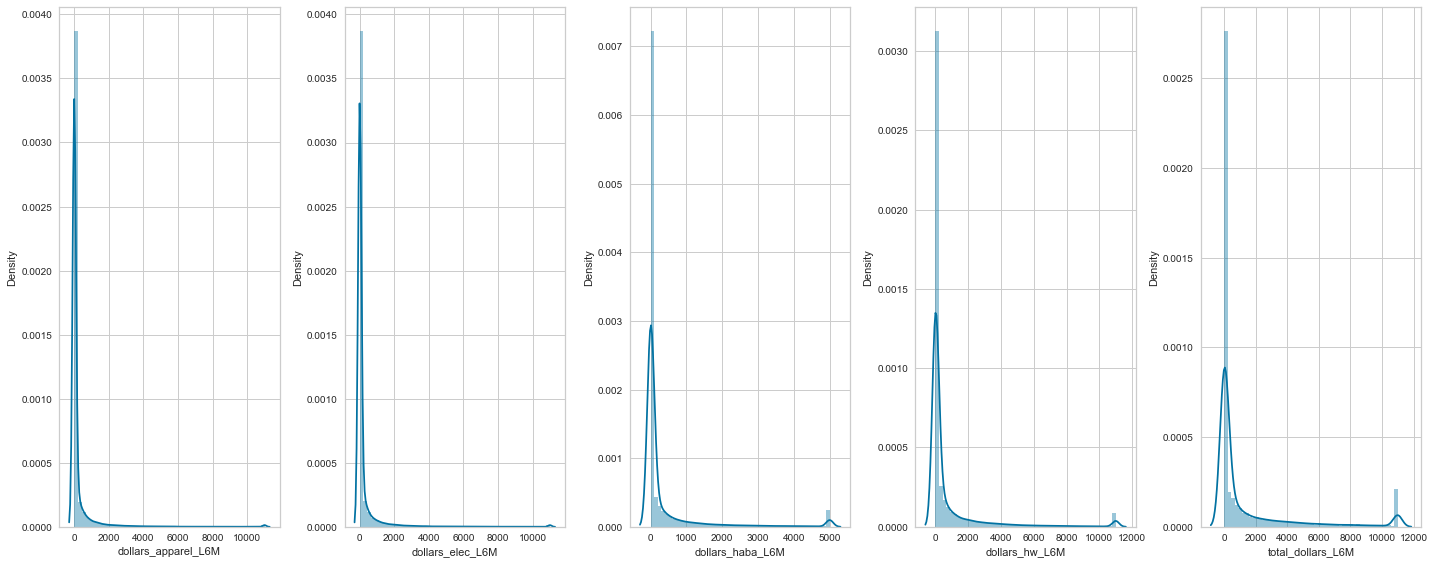

In [14]:
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M','dollars_hw_L6M', 'total_dollars_L6M']:
    if plotnumber <= 5:
        ax = plt.subplot(1, 5, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

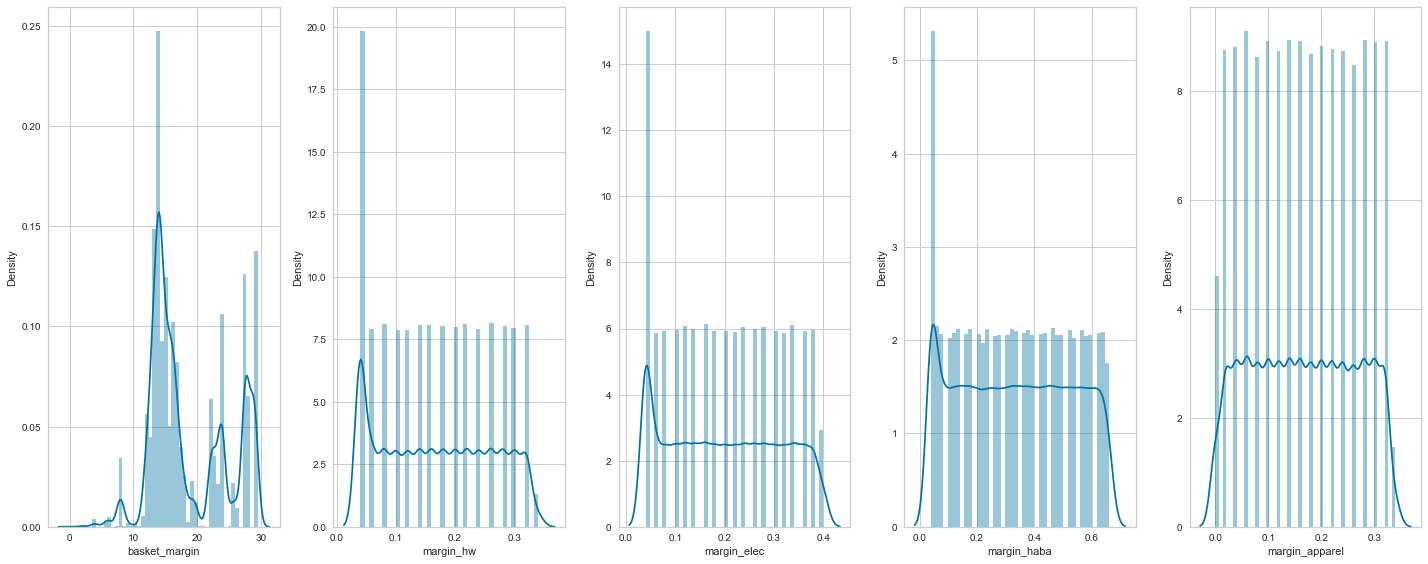

In [15]:
plt.figure(figsize = (20, 8))
plotnumber = 1

for col in ['basket_margin', 'margin_hw', 'margin_elec', 'margin_haba', 'margin_apparel']:
    if plotnumber <= 5:
        ax = plt.subplot(1, 5, plotnumber)
        sns.distplot(df[col])
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [16]:
df_clean['gender'] = df_clean['gender'].map({'M':1 ,'F':0})

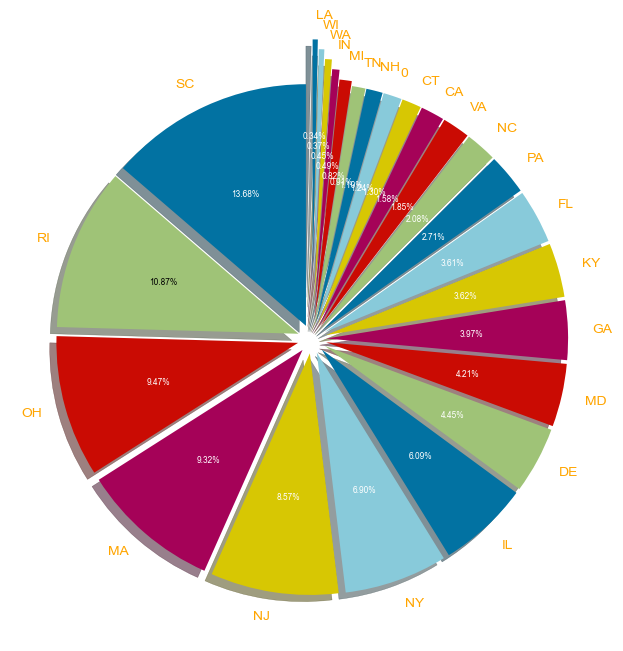

In [17]:
values = df_clean['state'].value_counts()

labels = ['SC','RI','OH', 'MA', 'NJ', 'NY', 'IL', 'DE', 'MD', 'GA', 'KY', 'FL', 'PA', 'NC',
 'VA', 'CA', 'CT', '0', 'NH', 'TN', 'MI', 'IN', 'WA', 'WI', 'LA']

fig, ax = plt.subplots(figsize = (8, 8), dpi = 100)
explode = (0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06, 0.08, 0.12, 0.16, 0.20, 0.24)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'orange')
plt.setp(autotexts, size = 6, color = 'white')
autotexts[1].set_color('black')
plt.show()

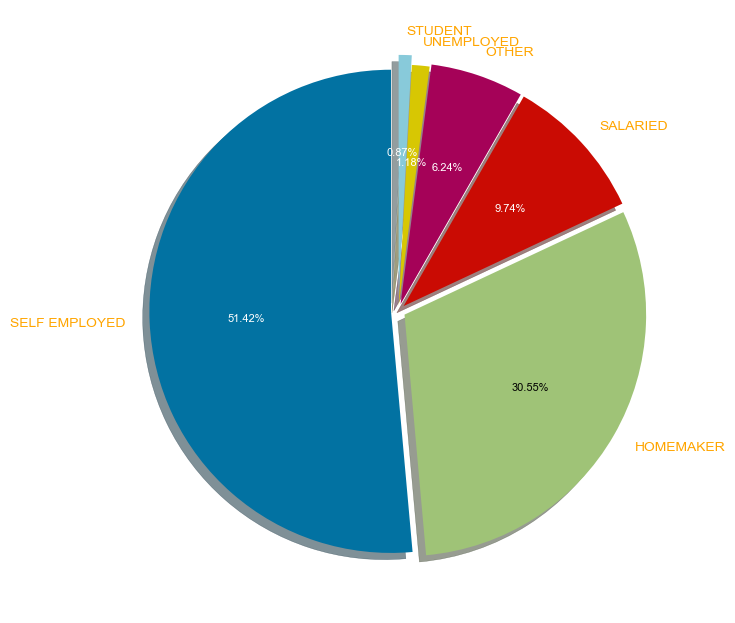

In [18]:
values = df_clean['cust_profession'].value_counts()

labels = ['SELF EMPLOYED', 'HOMEMAKER', 'SALARIED', 'OTHER', 'UNEMPLOYED', 'STUDENT']

fig, ax = plt.subplots(figsize = (8, 8), dpi = 100)
explode = (0.03, 0.03, 0.03, 0.03, 0.02, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'orange')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

# PCA

In [12]:
#Scaling
scaler = StandardScaler()
scaler.fit(df_clean)
scaled_ds = pd.DataFrame(scaler.transform(df_clean),columns= df_clean.columns )
print("All features are now scaled")

All features are now scaled


In [13]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,102539.0,4.355324e-15,2.414799,-2.169553,-1.417815,-1.069468,0.622891,30.764217
col2,102539.0,5.942469e-17,1.374768,-4.630300,-1.117786,0.161659,1.061253,6.282689
col3,102539.0,4.424989e-16,1.210979,-6.815013,-0.601009,0.133443,0.765674,7.720532


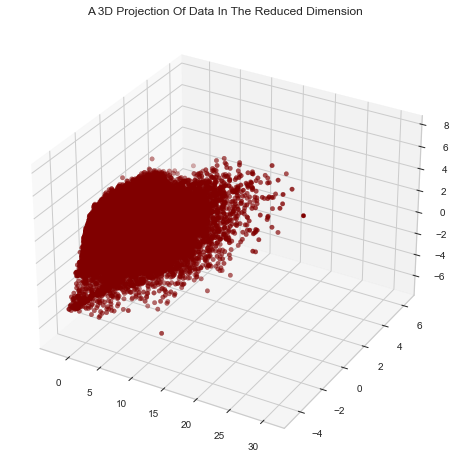

In [14]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [15]:
loadings = pd.DataFrame(pca.components_.T, columns=["col1","col2", "col3"], index=scaled_ds.columns)

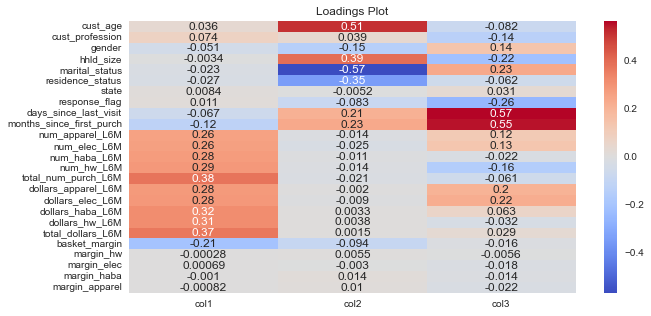

In [16]:
# Plot the loadings as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(loadings, cmap='coolwarm', annot=True)
plt.title('Loadings Plot')
plt.show()

The loading plot can help you identify which features are most strongly associated with each principal component.

# Clustering

Elbow Method to determine the number of clusters to be formed:


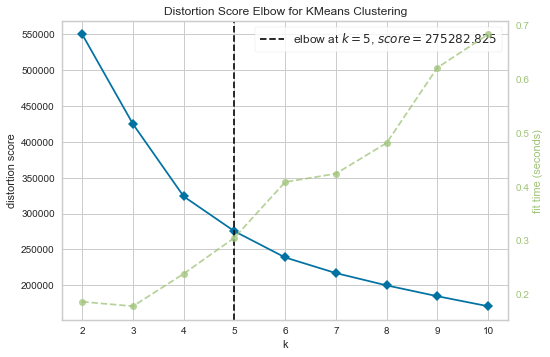

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [18]:
#Initiating the Agglomerative Clustering model 
km = KMeans(n_clusters=5)

In [19]:
# fit model and predict clusters
yhat_AC = km.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

In [20]:
#Adding the Clusters feature to the orignal dataframe.
df_clean["Clusters"]= yhat_AC

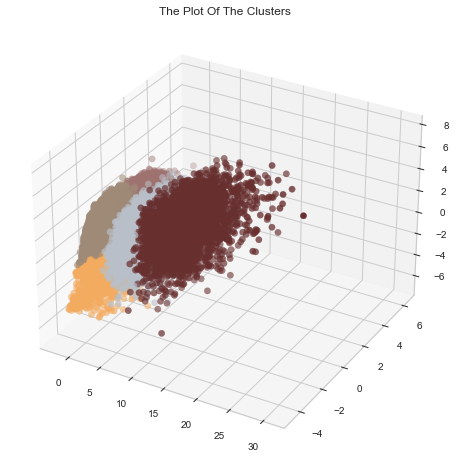

In [21]:
#Plotting the clusters
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [77]:
df_clean.to_csv("PCA_Clusters.csv",index=False)

In [78]:
df_clean

,cust_age,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,days_since_last_visit,months_since_first_purch,...,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,Clusters
0,28,0,0,12,0,0,0,0,205,24,...,0,0,0,0,29.000,0.08,0.04,0.54,0.28,1
1,54,1,0,10,0,0,1,0,206,56,...,0,0,0,0,14.542,0.12,0.06,0.28,0.20,1
2,39,2,1,7,0,0,2,0,206,13,...,0,0,0,0,22.098,0.14,0.18,0.04,0.16,1
3,40,1,0,6,0,0,3,0,120,4,...,0,0,0,0,23.900,0.20,0.28,0.36,0.12,1
4,40,3,0,6,0,0,4,0,204,8,...,0,0,0,0,23.900,0.06,0.34,0.14,0.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102534,24,0,0,1,3,0,16,0,205,14,...,1398,1681,719,4196,13.946,0.22,0.08,0.54,0.12,2
102535,56,1,0,1,0,2,16,0,208,16,...,0,466,0,753,15.086,0.04,0.04,0.16,0.10,1
102536,58,1,0,1,1,2,16,0,207,15,...,0,201,2509,2718,7.904,0.26,0.12,0.52,0.06,2
102537,36,5,0,1,3,0,16,0,213,15,...,0,600,0,869,13.200,0.04,0.12,0.40,0.24,1


#### Unencode the encoding

In [22]:
dfnew = df_clean

In [23]:
# Reverse mapping of 'cust_profession'
rev_cust_profession = {v: k for k, v in {'SELF EMPLOYED':0, 'HOMEMAKER':1, 'SALARIED':2, 'OTHER':3, 'UNEMPLOYED':4, 'STUDENT':5}.items()}
dfnew['cust_profession'] = dfnew['cust_profession'].map(rev_cust_profession)


In [24]:
# Reverse mapping of 'marital_status'
rev_marital_status = {v: k for k, v in {'Married':0,'Divorced / Separated':1, 'Unknown':2, 'Single':3}.items()}
dfnew['marital_status'] = dfnew['marital_status'].map(rev_marital_status)


In [25]:
# Reverse mapping of 'residence_status'
rev_residence_status = {v: k for k, v in {'Rental':0, 'Other':1, 'Homeowners':2, 'Unknown':3}.items()}
dfnew['residence_status'] = dfnew['residence_status'].map(rev_residence_status)


In [26]:
# Reverse mapping of 'state'
rev_state = {v: k for k, v in {'SC':0,'RI':1,'OH':2, 'MA':3, 'NJ':4, 'NY':5, 'IL':6, 'DE':7, 'MD':8, 'GA':9, 'KY':10, 'FL':11, 'PA':12, 'NC':13,
 'VA':14, 'CA':15, 'CT':16, '0':17, 'NH':18, 'TN':19, 'MI':20, 'IN':21, 'WA':22, 'WI':23, 'LA':24}.items()}
dfnew['state'] = dfnew['state'].map(rev_state)

In [27]:
dfnew

,cust_age,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,days_since_last_visit,months_since_first_purch,...,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,Clusters
0,28,SELF EMPLOYED,0,12,Married,Rental,SC,0,205,24,...,0,0,0,0,29.000,0.08,0.04,0.54,0.28,1
1,54,HOMEMAKER,0,10,Married,Rental,RI,0,206,56,...,0,0,0,0,14.542,0.12,0.06,0.28,0.20,1
2,39,SALARIED,1,7,Married,Rental,OH,0,206,13,...,0,0,0,0,22.098,0.14,0.18,0.04,0.16,1
3,40,HOMEMAKER,0,6,Married,Rental,MA,0,120,4,...,0,0,0,0,23.900,0.20,0.28,0.36,0.12,1
4,40,OTHER,0,6,Married,Rental,NJ,0,204,8,...,0,0,0,0,23.900,0.06,0.34,0.14,0.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102534,24,SELF EMPLOYED,0,1,Single,Rental,CT,0,205,14,...,1398,1681,719,4196,13.946,0.22,0.08,0.54,0.12,2
102535,56,HOMEMAKER,0,1,Married,Homeowners,CT,0,208,16,...,0,466,0,753,15.086,0.04,0.04,0.16,0.10,1
102536,58,HOMEMAKER,0,1,Divorced / Separated,Homeowners,CT,0,207,15,...,0,201,2509,2718,7.904,0.26,0.12,0.52,0.06,2
102537,36,STUDENT,0,1,Single,Rental,CT,0,213,15,...,0,600,0,869,13.200,0.04,0.12,0.40,0.24,1


In [28]:
dfnew.to_csv("PCA_Clusters_reverse_encode.csv",index=False)

In [29]:
df_clean

,cust_age,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,days_since_last_visit,months_since_first_purch,...,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,Clusters
0,28,SELF EMPLOYED,0,12,Married,Rental,SC,0,205,24,...,0,0,0,0,29.000,0.08,0.04,0.54,0.28,1
1,54,HOMEMAKER,0,10,Married,Rental,RI,0,206,56,...,0,0,0,0,14.542,0.12,0.06,0.28,0.20,1
2,39,SALARIED,1,7,Married,Rental,OH,0,206,13,...,0,0,0,0,22.098,0.14,0.18,0.04,0.16,1
3,40,HOMEMAKER,0,6,Married,Rental,MA,0,120,4,...,0,0,0,0,23.900,0.20,0.28,0.36,0.12,1
4,40,OTHER,0,6,Married,Rental,NJ,0,204,8,...,0,0,0,0,23.900,0.06,0.34,0.14,0.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102534,24,SELF EMPLOYED,0,1,Single,Rental,CT,0,205,14,...,1398,1681,719,4196,13.946,0.22,0.08,0.54,0.12,2
102535,56,HOMEMAKER,0,1,Married,Homeowners,CT,0,208,16,...,0,466,0,753,15.086,0.04,0.04,0.16,0.10,1
102536,58,HOMEMAKER,0,1,Divorced / Separated,Homeowners,CT,0,207,15,...,0,201,2509,2718,7.904,0.26,0.12,0.52,0.06,2
102537,36,STUDENT,0,1,Single,Rental,CT,0,213,15,...,0,600,0,869,13.200,0.04,0.12,0.40,0.24,1


In [28]:
##interpret the clusters
dfgroup = df_clean.groupby('Clusters').mean()
dfgroup.to_csv('dfgroupPCA.csv',index=False)

# Evaluating Model

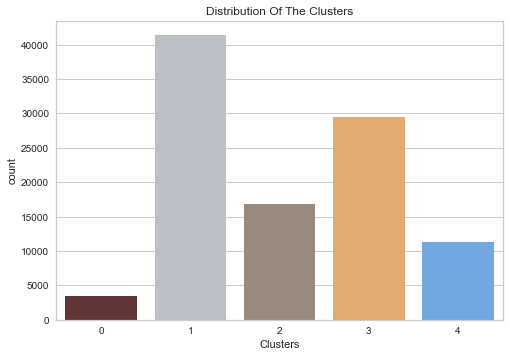

In [79]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60","#60a8f3"]
pl = sns.countplot(x=df_clean["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

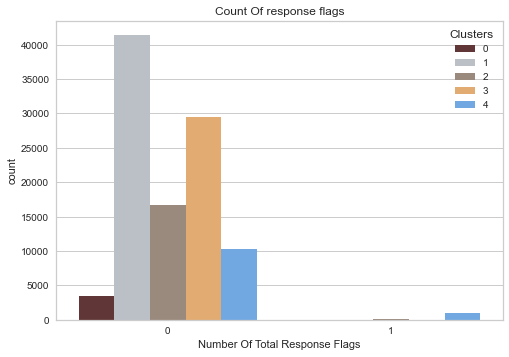

In [80]:
#Plotting count of total response_flags.
plt.figure()
pl = sns.countplot(x=df_clean["response_flag"],hue=df_clean["Clusters"], palette= pal)
pl.set_title("Count Of response flags")
pl.set_xlabel("Number Of Total Response Flags")
plt.show()

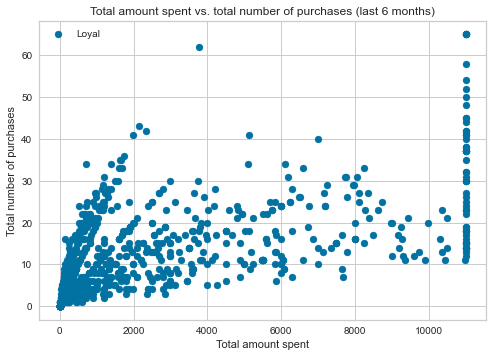

In [81]:
loyal = df_clean[df_clean['response_flag'] == 1]
non_loyal = df_clean[df_clean['response_flag'] == 0]

plt.scatter(loyal['total_dollars_L6M'], loyal['total_num_purch_L6M'], label='Loyal')
#plt.scatter(non_loyal['total_dollars_L6M'], non_loyal['total_num_purch_L6M'], label='Non-loyal')
plt.title('Total amount spent vs. total number of purchases (last 6 months)')
plt.xlabel('Total amount spent')
plt.ylabel('Total number of purchases')
plt.legend()
plt.show()

##### Variables that could drive loyalty
- cust_age: Age may affect loyalty, as customers from different age groups may have varying preferences and shopping habits.
- cust_income: Higher-income customers might be more likely to make frequent or high-value purchases.
- cust_profession: Profession could be related to purchasing power and brand preferences, affecting customer loyalty.
- hhld_size: Household size may influence the types of products customers buy and their overall spending.
- days_since_last_visit: Frequent store visits may indicate a higher level of loyalty.
- months_since_first_purch: A longer relationship with the brand could be an indicator of stronger loyalty.
- total_num_purch_L6M: The total number of purchases made in the last six months can reflect customer engagement and loyalty.
- total_dollars_L6M: The total amount spent on all categories in the last six months may indicate higher loyalty, as loyal customers tend to spend more.
- basket_margin: Customers with higher overall purchase margins might be more loyal if they perceive better value from the retailer.
- response_flag: If a customer has responded to a promotion in the last 12 months, they may be more engaged and loyal.

In [82]:
# Example variables for cluster characteristics
selected_attributes = ['cust_age', 'cust_profession', 'gender', 'hhld_size', 'marital_status',
       'residence_status', 'state', 'response_flag', 'days_since_last_visit',
       'months_since_first_purch', 'num_apparel_L6M', 'num_elec_L6M',
       'num_haba_L6M', 'num_hw_L6M', 'total_num_purch_L6M',
       'dollars_apparel_L6M', 'dollars_elec_L6M', 'dollars_haba_L6M',
       'dollars_hw_L6M', 'total_dollars_L6M', 'basket_margin', 'margin_hw',
       'margin_elec', 'margin_haba', 'margin_apparel']

# Calculate average values for selected attributes per cluster
cluster_summary = df_clean.groupby('Clusters')[selected_attributes].mean().reset_index()

In [83]:
# Melt the DataFrame for easier plotting
cluster_summary_melted = pd.melt(cluster_summary, id_vars=['Clusters'], var_name='Attribute', value_name='Average Value')

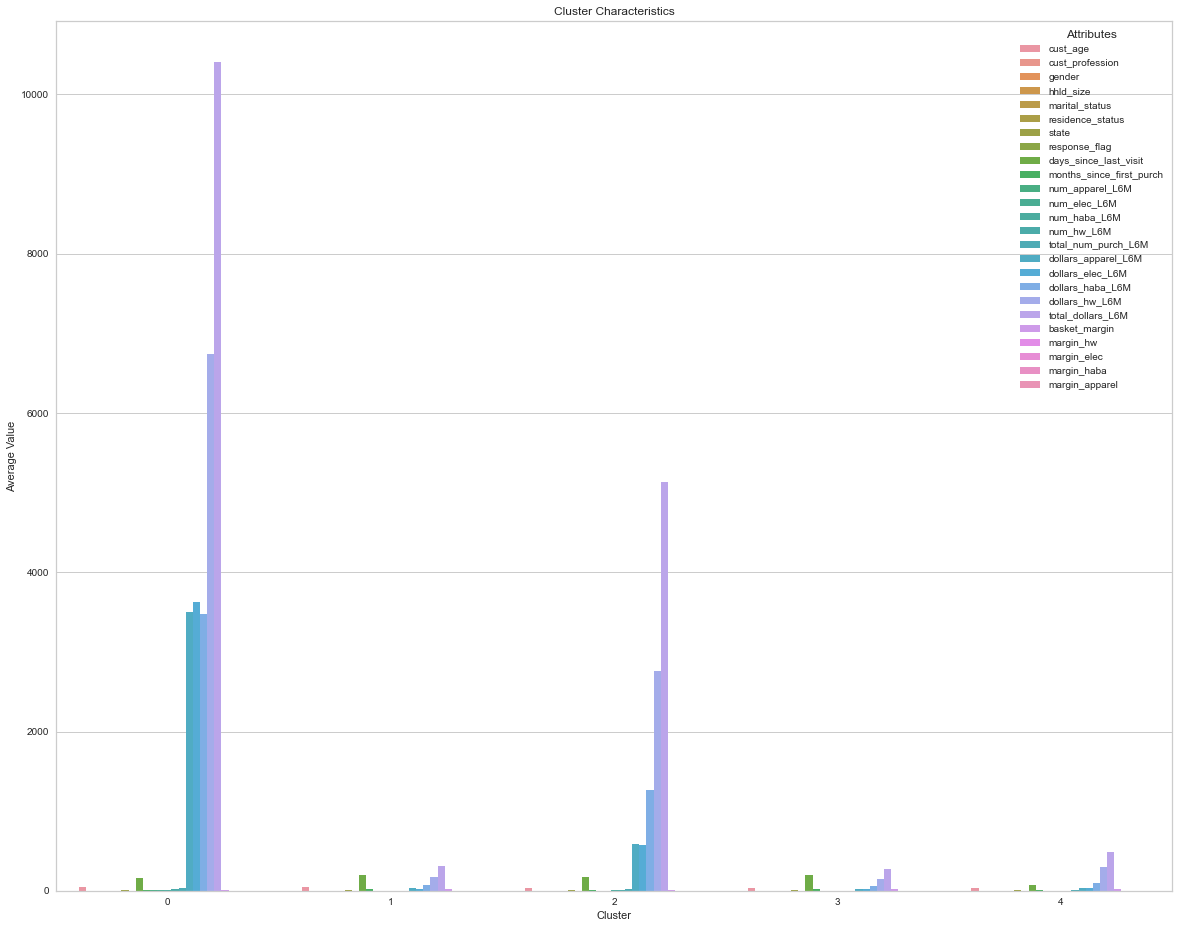

In [84]:
# Visual for Slide 2: Cluster Characteristics
plt.figure(figsize=(20, 16))
sns.barplot(x='Clusters', y='Average Value', hue='Attribute', data=cluster_summary_melted)
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend(title='Attributes', loc='upper right')
plt.show()


In [47]:
# Example variables for customer personas
persona_attributes = ['cust_age', 'cust_profession', 'gender', 'hhld_size', 'marital_status',
       'residence_status', 'state']

In [53]:
# Create customer persona DataFrame with mean values for each attribute per cluster
persona_data = []
for cluster in df_clean['Clusters'].unique():
    cluster_data = df_clean[df_clean['Clusters'] == cluster]
    persona = cluster_data[persona_attributes].mean().to_dict()
    persona['Cluster'] = cluster
    persona_data.append(persona)

In [54]:
cluster_persona = pd.DataFrame(persona_data)
cluster_persona.set_index('Cluster', inplace=True)

In [55]:
cluster_persona = cluster_persona.replace(np.nan, 0)

In [51]:
# Normalize the values across attributes
normalized_cluster_persona = cluster_persona.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

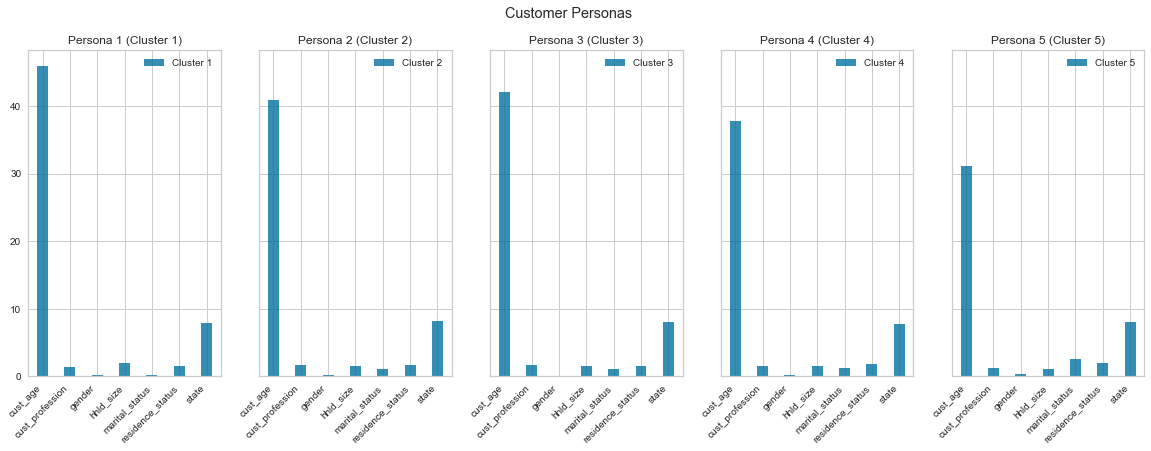

In [56]:
# Visual for Slide 3: Customer Personas
num_clusters = len(cluster_persona)
fig, axes = plt.subplots(nrows=1, ncols=num_clusters, figsize=(4 * num_clusters, 6), sharey=True)
bar_width = 0.4
opacity = 0.8

for i, ax in enumerate(axes.flat):
    persona = cluster_persona.iloc[i]
    index = np.arange(len(persona))
    ax.bar(index, persona, bar_width, alpha=opacity, color='b', label=f'Cluster {i+1}')
    ax.set_xticks(index)
    ax.set_xticklabels(persona.index, rotation=45, ha='right')
    ax.set_title(f'Persona {i+1} (Cluster {i+1})')
    ax.legend()

plt.suptitle('Customer Personas')
plt.show()

# Profiling

In [28]:
df_clean

,cust_age,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,days_since_last_visit,months_since_first_purch,...,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,Clusters
0,28,0,0,12,0,0,0,0,205,24,...,0,0,0,0,29.000,0.08,0.04,0.54,0.28,1
1,54,1,0,10,0,0,1,0,206,56,...,0,0,0,0,14.542,0.12,0.06,0.28,0.20,1
2,39,2,1,7,0,0,2,0,206,13,...,0,0,0,0,22.098,0.14,0.18,0.04,0.16,1
3,40,1,0,6,0,0,3,0,120,4,...,0,0,0,0,23.900,0.20,0.28,0.36,0.12,1
4,40,3,0,6,0,0,4,0,204,8,...,0,0,0,0,23.900,0.06,0.34,0.14,0.18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102534,24,0,0,1,3,0,16,0,205,14,...,1398,1681,719,4196,13.946,0.22,0.08,0.54,0.12,2
102535,56,1,0,1,0,2,16,0,208,16,...,0,466,0,753,15.086,0.04,0.04,0.16,0.10,1
102536,58,1,0,1,1,2,16,0,207,15,...,0,201,2509,2718,7.904,0.26,0.12,0.52,0.06,2
102537,36,5,0,1,3,0,16,0,213,15,...,0,600,0,869,13.200,0.04,0.12,0.40,0.24,1


<Figure size 576x396 with 0 Axes>

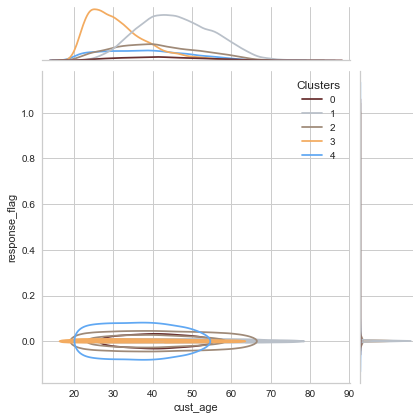

<Figure size 576x396 with 0 Axes>

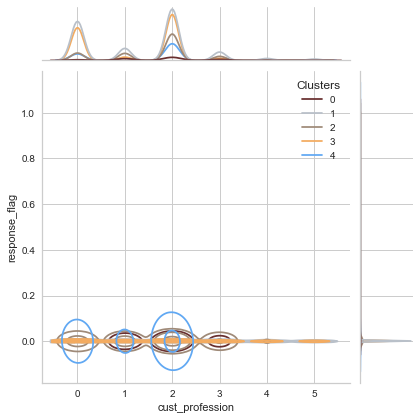

<Figure size 576x396 with 0 Axes>

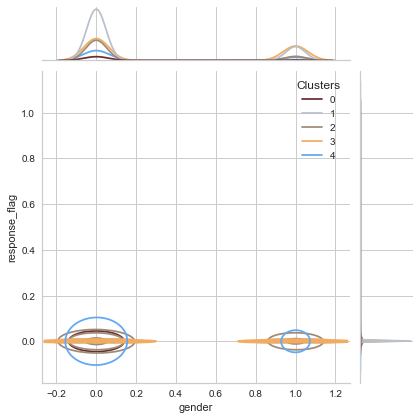

<Figure size 576x396 with 0 Axes>

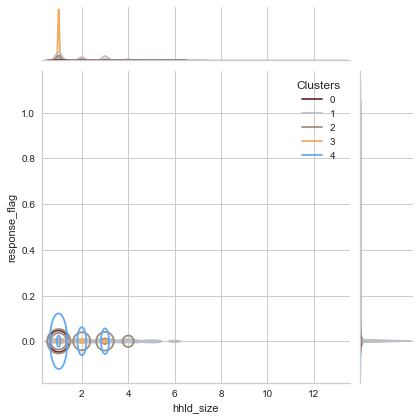

<Figure size 576x396 with 0 Axes>

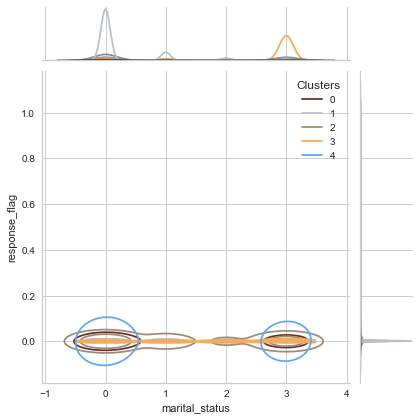

<Figure size 576x396 with 0 Axes>

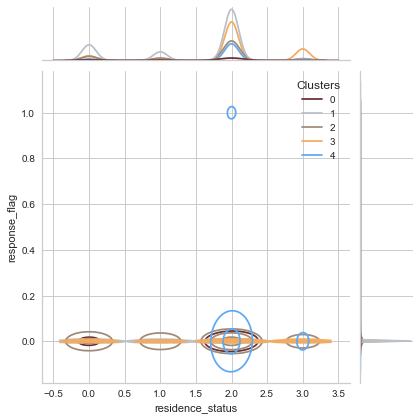

<Figure size 576x396 with 0 Axes>

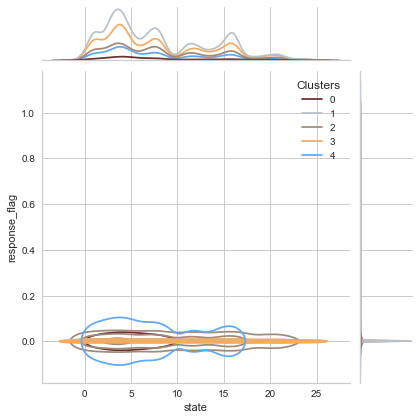

In [29]:
Personal = ['cust_age', 'cust_profession', 'gender', 'hhld_size', 'marital_status',
       'residence_status', 'state']

for i in Personal:
    plt.figure()
    sns.jointplot(x=df_clean[i], y=df_clean["response_flag"], hue =df_clean["Clusters"], kind="kde", palette=pal)
    plt.show()

<Figure size 576x396 with 0 Axes>

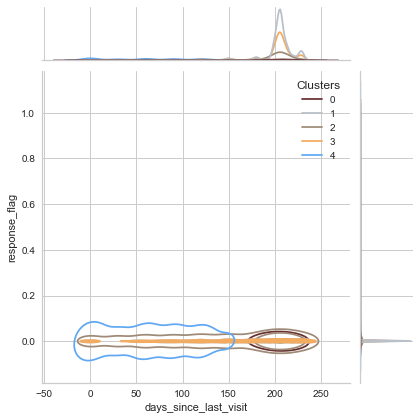

<Figure size 576x396 with 0 Axes>

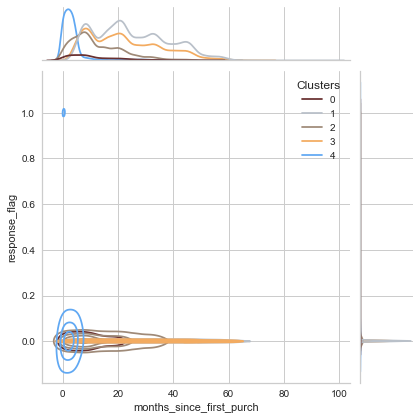

In [31]:
Engagement = ['days_since_last_visit', 'months_since_first_purch']

for i in Engagement:
    plt.figure()
    sns.jointplot(x=df_clean[i], y=df_clean["response_flag"], hue =df_clean["Clusters"], kind="kde", palette=pal)
    plt.show()

<Figure size 576x396 with 0 Axes>

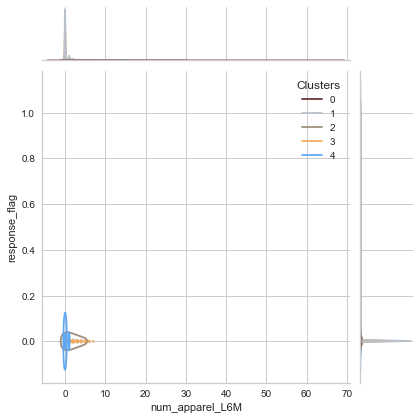

<Figure size 576x396 with 0 Axes>

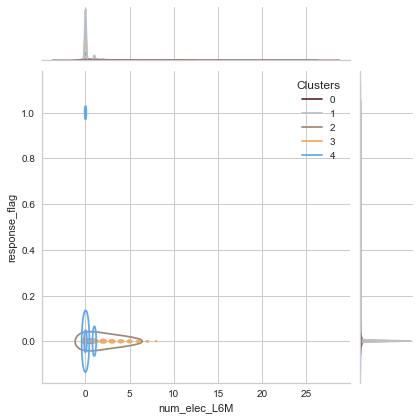

<Figure size 576x396 with 0 Axes>

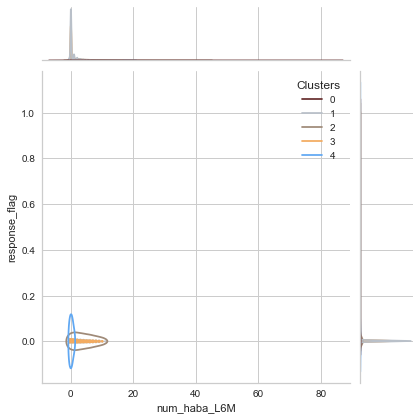

<Figure size 576x396 with 0 Axes>

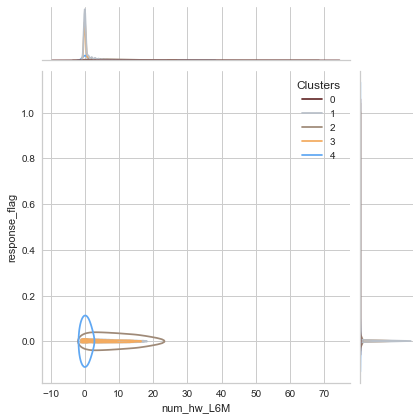

<Figure size 576x396 with 0 Axes>

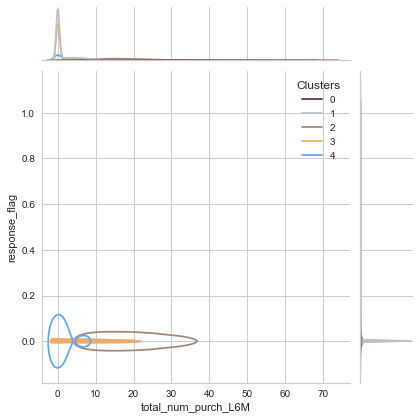

In [33]:
Purchase = ['num_apparel_L6M', 'num_elec_L6M', 'num_haba_L6M', 'num_hw_L6M', 'total_num_purch_L6M']

for i in Purchase:
    plt.figure()
    sns.jointplot(x=df_clean[i], y=df_clean['response_flag'], hue =df_clean["Clusters"], kind="kde", palette=pal)
    plt.show()

<Figure size 576x396 with 0 Axes>

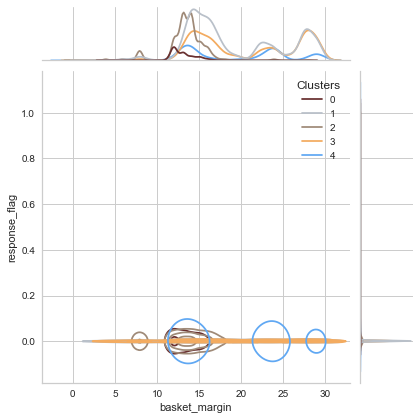

<Figure size 576x396 with 0 Axes>

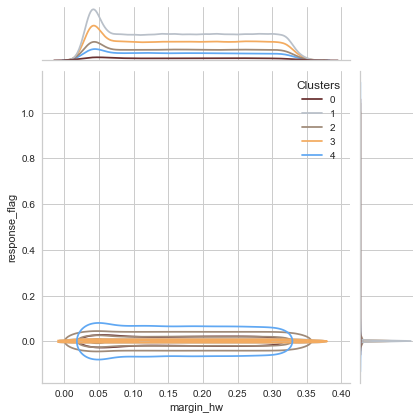

<Figure size 576x396 with 0 Axes>

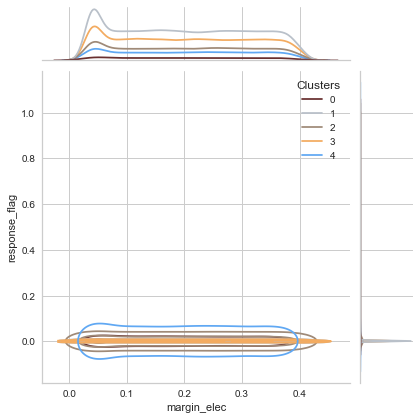

<Figure size 576x396 with 0 Axes>

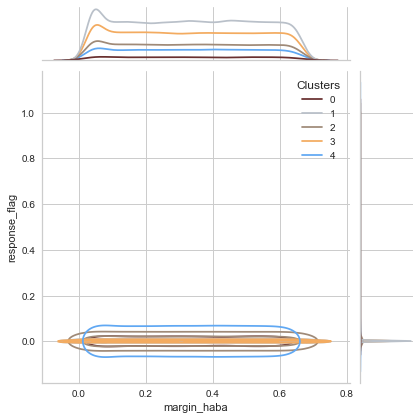

<Figure size 576x396 with 0 Axes>

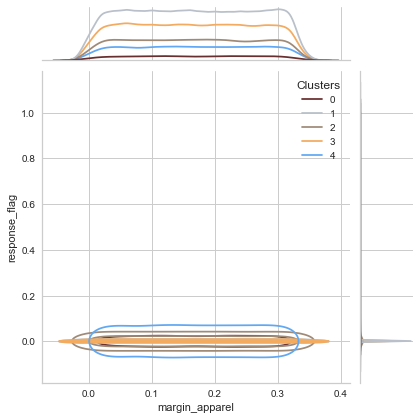

In [35]:
Profitability = ['basket_margin', 'margin_hw', 'margin_elec', 'margin_haba', 'margin_apparel']

for i in Profitability:
    plt.figure()
    sns.jointplot(x=df_clean[i], y=df_clean['response_flag'], hue =df_clean["Clusters"], kind="kde", palette=pal)
    plt.show()

# Conclusion

#### Cluster 1:
- Average customer age: 42.12
- Gender distribution (male): 11.21%
- Average household size: 1.50
- Response flag: 1.05%
- Days since last visit: 162.74
- Months since first purchase: 11.31
- Number of purchases in different categories L6M (last 6 months): Apparel (6.17), Electronics (6.24), HABA (11.24), HW (17.27)
- Total number of purchases L6M: 38.70
- Total dollars spent in different categories L6M: Apparel ($3495.55), Electronics ($3621.67), HABA ($3475.97), HW ($6736.37)
- Total dollars spent L6M: $10400.08
- Margin percentages in different categories: HW (16.95%), Electronics (20.20%), HABA (33.39%), Apparel (16.68%)

#### Cluster 2:
- Average customer age: 45.99
- Gender distribution (male): 21.25%
- Average household size: 1.94
- Response flag: 0.01%
- Days since last visit: 203.02
- Months since first purchase: 25.03
- Number of purchases in different categories L6M: Apparel (0.22), Electronics (0.21), HABA (0.46), HW (1.06)
- Total number of purchases L6M: 1.95
- Total dollars spent in different categories L6M: Apparel ($29.24), Electronics ($28.50), HABA ($66.73), HW ($168.75)
- Total dollars spent L6M: $311.52
- Margin percentages in different categories: HW (16.95%), Electronics (20.10%), HABA (33.48%), Apparel (16.69%)

#### Cluster 3:
- Average customer age: 41.00
- Gender distribution (male): 16.81%
- Average household size: 1.57
- Response flag: 0.99%
- Days since last visit: 174.58
- Months since first purchase: 12.57
- Number of purchases in different categories L6M: Apparel (2.31), Electronics (2.30), HABA (4.86), HW (9.39)
- Total number of purchases L6M: 18.86
- Total dollars spent in different categories L6M: Apparel ($582.39), Electronics ($577.22), HABA ($1266.73), HW ($2757.37)
- Total dollars spent L6M: $5136.45
- Margin percentages in different categories: HW (16.95%), Electronics (20.23%), HABA (33.29%), Apparel (16.55%)

#### Cluster 4:
- Average customer age: 31.18
- Gender distribution (male): 39.70%
- Average household size: 1.05
- Response flag: 0.01%
- Days since last visit: 199.61
- Months since first purchase: 22.38
- Number of purchases in different categories L6M: Apparel (0.21), Electronics (0.22), HABA (0.43), HW (0.92)
- Total number of purchases L6M: 1.78
- Total dollars spent in different categories L6M: Electronics ($27.45), HABA ($59.62), HW ($143.65)
- Total dollars spent L6M: $273.19
- Margin percentages in different categories: HW (16.93%), Electronics (20.21%), HABA (33.28%), Apparel (16.54%)

#### Cluster 5:
- Average customer age: 37.88
- Gender distribution (male): 24.20%
- Average household size: 1.53
- Response flag: 9.05%
- Days since last visit: 74.08
- Months since first purchase: 3.94
- Number of purchases in different categories L6M: Apparel (0.37), Electronics (0.35), HABA (0.92), HW (2.63)
- Total number of purchases L6M: 4.27
- Total dollars spent in different categories L6M: Apparel ($34.72), Electronics ($33.02), HABA ($98.52), HW ($304.49)
- Total dollars spent L6M: $487.98
- Margin percentages in different categories: HW (16.90%), Electronics (20.32%), HABA (33.53%), Apparel (16.75%)

#### Similarities:
- Margin percentages across different product categories remain relatively stable across all clusters.

#### Differences:
- Clusters vary in average customer age, gender distribution, and household size.
- There are noticeable differences in the number of days since the last visit and months since the first purchase.
- Significant variation is seen in the number of purchases and total dollars spent in each product category and overall in the last 6 months.

## Suggested priority for clusters, ranked from high to low:

### Cluster 1:
- This cluster represents customers with the highest total dollars spent in the last 6 months ($10,400.08) and the highest number of purchases across all categories. These customers are likely the most valuable and engaged, so retaining and further engaging this segment should be a priority.

### Cluster 3:
- Customers in this cluster also have relatively high spending in the last 6 months ($5,136.45) and a significant number of purchases across all categories. They may have the potential to be further engaged and upsold to increase their spending.

### Cluster 5:
- Though this cluster has lower spending in the last 6 months ($487.98) compared to Clusters 1 and 3, they have a higher response flag (9.05%) and a shorter time since the last visit (74.08 days). This indicates that customers in this cluster are more responsive to promotions and have the potential to become higher-value customers if targeted effectively.

### Cluster 2:
- Customers in this cluster have lower overall spending in the last 6 months ($311.52) and fewer purchases. However, they have a larger average household size (1.94) and higher average customer age (45.99), which could indicate different preferences and purchasing habits. Tailored marketing strategies targeting their needs may be successful in increasing their spending.

### Cluster 4:
- This cluster has the lowest total dollars spent in the last 6 months ($273.19) and the lowest number of purchases across all categories. Customers in this cluster may require more aggressive marketing efforts and incentives to increase their engagement and spending. However, given the limited resources, focusing on the other clusters with higher spending and more potential might be more beneficial.

In [64]:
cluster1df = df_clean[df_clean['Clusters'] == 0]
cluster2df = df_clean[df_clean['Clusters'] == 1]
cluster3df = df_clean[df_clean['Clusters'] == 2]
cluster4df = df_clean[df_clean['Clusters'] == 3]
cluster5df = df_clean[df_clean['Clusters'] == 4]

In [76]:
cluster1df

,cust_age,cust_profession,gender,hhld_size,marital_status,residence_status,state,response_flag,days_since_last_visit,months_since_first_purch,...,dollars_elec_L6M,dollars_haba_L6M,dollars_hw_L6M,total_dollars_L6M,basket_margin,margin_hw,margin_elec,margin_haba,margin_apparel,Clusters
12,36,2,1,5,0,0,4,0,0,0,...,0,5000,11000,11000,12.014,0.16,0.04,0.04,0.26,0
52,46,3,0,5,0,0,1,0,204,22,...,11000,5000,3269,11000,14.084,0.20,0.26,0.20,0.12,0
55,40,3,0,5,0,0,2,0,206,36,...,0,3583,11000,11000,12.034,0.04,0.04,0.52,0.08,0
66,48,2,0,4,0,0,17,0,90,3,...,1185,4865,10234,11000,23.900,0.04,0.30,0.04,0.30,0
68,35,3,0,4,0,0,12,0,120,4,...,912,380,11000,11000,13.254,0.20,0.08,0.24,0.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102381,39,1,0,1,1,0,16,0,207,19,...,2449,5000,11000,11000,13.234,0.18,0.26,0.36,0.00,0
102407,47,5,0,1,3,0,16,0,207,13,...,400,5000,2389,9821,15.078,0.04,0.12,0.50,0.14,0
102448,72,5,0,1,0,0,16,0,206,27,...,1244,5000,11000,11000,13.992,0.08,0.08,0.58,0.18,0
102461,56,1,0,1,0,2,16,0,226,14,...,532,2348,11000,11000,13.080,0.24,0.08,0.28,0.20,0


In [65]:
print(cluster1df.mean())

cust_age                       42.121681
cust_profession                 1.762183
gender                          0.112051
hhld_size                       1.495769
marital_status                  1.105048
residence_status                1.551795
state                           8.062737
response_flag                   0.010505
days_since_last_visit         162.744383
months_since_first_purch       11.307266
num_apparel_L6M                 6.165159
num_elec_L6M                    6.236358
num_haba_L6M                   11.235191
num_hw_L6M                     17.273417
total_num_purch_L6M            38.696528
dollars_apparel_L6M          3495.545667
dollars_elec_L6M             3621.667931
dollars_haba_L6M             3475.974905
dollars_hw_L6M               6736.367377
total_dollars_L6M           10400.079662
basket_margin                  13.194477
margin_hw                       0.169548
margin_elec                     0.202025
margin_haba                     0.333948
margin_apparel  

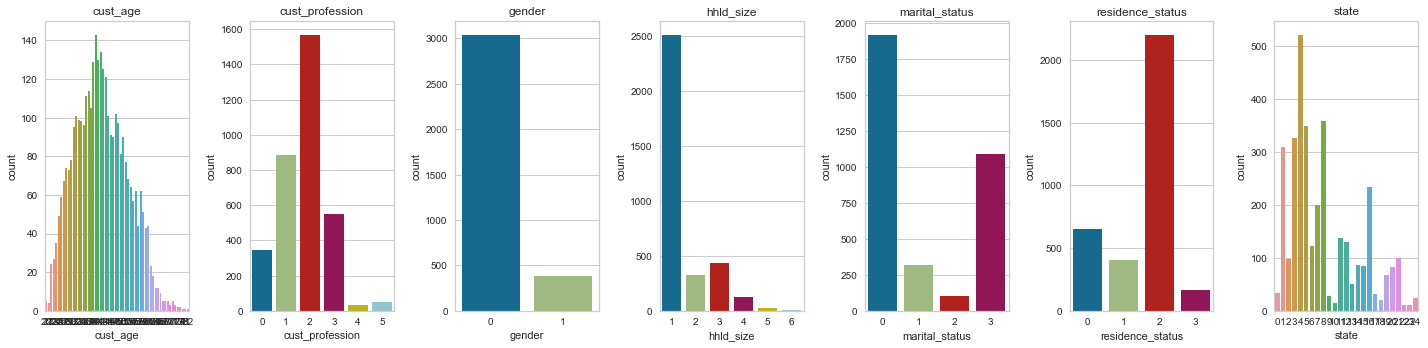

In [70]:
selected_features = ['cust_age', 'cust_profession', 'gender', 'hhld_size', 'marital_status',
       'residence_status', 'state']

# Set the figure size
plt.figure(figsize=(20, 5))

# Loop through the selected features and create a countplot for each one
for i, feature in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i+1)
    sns.countplot(x=feature, data=cluster1df)
    plt.title(feature)

# Adjust the spacing between the plots
plt.tight_layout()

# Show the plots
plt.show()

In [66]:
print(cluster2df.mean())

cust_age                     45.992633
cust_profession               1.353573
gender                        0.212497
hhld_size                     1.944883
marital_status                0.277275
residence_status              1.493370
state                         7.936816
response_flag                 0.000121
days_since_last_visit       203.020941
months_since_first_purch     25.028694
num_apparel_L6M               0.220515
num_elec_L6M                  0.213777
num_haba_L6M                  0.464362
num_hw_L6M                    1.056107
total_num_purch_L6M           1.954762
dollars_apparel_L6M          29.237229
dollars_elec_L6M             28.497790
dollars_haba_L6M             66.725817
dollars_hw_L6M              168.749197
total_dollars_L6M           311.523537
basket_margin                19.208016
margin_hw                     0.169481
margin_elec                   0.200991
margin_haba                   0.334762
margin_apparel                0.166904
Clusters                 

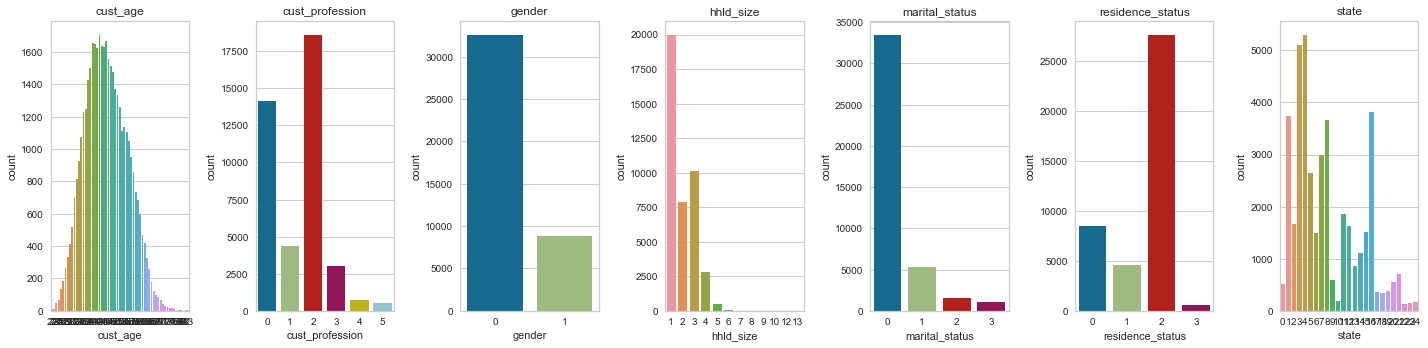

In [71]:
selected_features = ['cust_age', 'cust_profession', 'gender', 'hhld_size', 'marital_status',
       'residence_status', 'state']

# Set the figure size
plt.figure(figsize=(20, 5))

# Loop through the selected features and create a countplot for each one
for i, feature in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i+1)
    sns.countplot(x=feature, data=cluster2df)
    plt.title(feature)

# Adjust the spacing between the plots
plt.tight_layout()

# Show the plots
plt.show()

In [67]:
print(cluster3df.mean())

cust_age                      40.999349
cust_profession                1.673415
gender                         0.168058
hhld_size                      1.569230
marital_status                 1.049725
residence_status               1.662701
state                          8.208074
response_flag                  0.009945
days_since_last_visit        174.579352
months_since_first_purch      12.568105
num_apparel_L6M                2.310720
num_elec_L6M                   2.303913
num_haba_L6M                   4.858995
num_hw_L6M                     9.385012
total_num_purch_L6M           18.859528
dollars_apparel_L6M          582.387379
dollars_elec_L6M             577.215355
dollars_haba_L6M            1266.729888
dollars_hw_L6M              2757.366661
total_dollars_L6M           5136.453797
basket_margin                 13.505270
margin_hw                      0.169467
margin_elec                    0.202341
margin_haba                    0.332850
margin_apparel                 0.165472


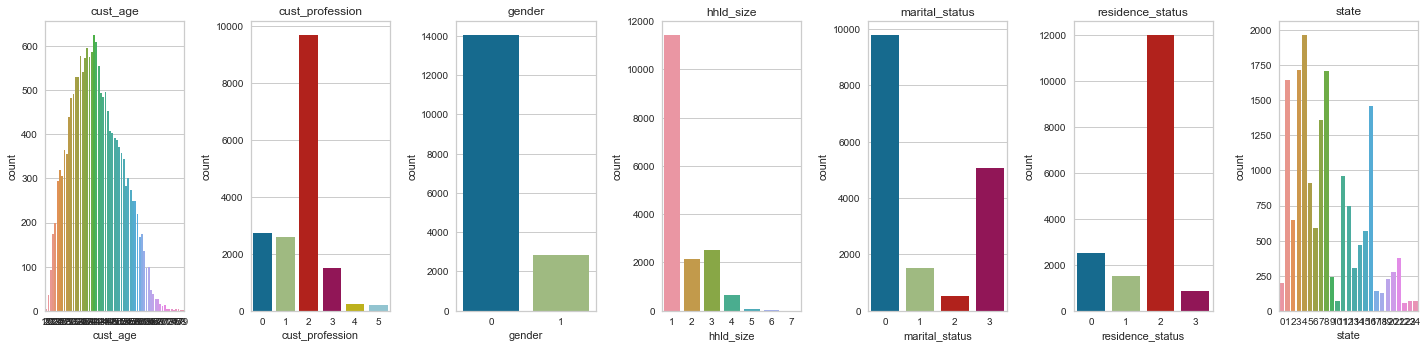

In [72]:
selected_features = ['cust_age', 'cust_profession', 'gender', 'hhld_size', 'marital_status',
       'residence_status', 'state']

# Set the figure size
plt.figure(figsize=(20, 5))

# Loop through the selected features and create a countplot for each one
for i, feature in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i+1)
    sns.countplot(x=feature, data=cluster3df)
    plt.title(feature)

# Adjust the spacing between the plots
plt.tight_layout()

# Show the plots
plt.show()

In [68]:
print(cluster4df.mean())

cust_age                     31.177388
cust_profession               1.228994
gender                        0.396975
hhld_size                     1.046225
marital_status                2.606409
residence_status              2.010050
state                         8.069270
response_flag                 0.000102
days_since_last_visit       199.605732
months_since_first_purch     22.381916
num_apparel_L6M               0.212649
num_elec_L6M                  0.215390
num_haba_L6M                  0.431457
num_hw_L6M                    0.920003
total_num_purch_L6M           1.779500
dollars_apparel_L6M          27.901052
dollars_elec_L6M             27.454435
dollars_haba_L6M             59.619336
dollars_hw_L6M              143.654563
total_dollars_L6M           273.187269
basket_margin                20.640981
margin_hw                     0.169273
margin_elec                   0.202091
margin_haba                   0.332757
margin_apparel                0.165427
Clusters                 

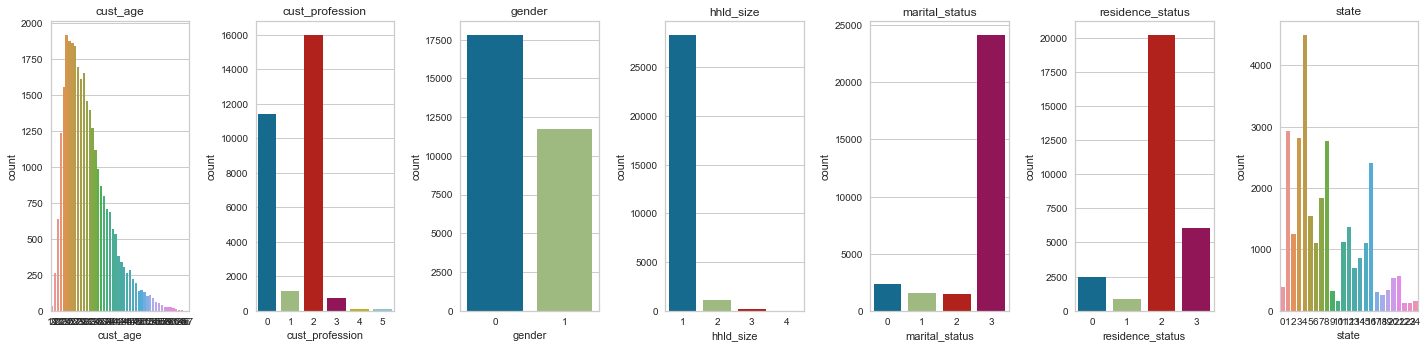

In [73]:
selected_features = ['cust_age', 'cust_profession', 'gender', 'hhld_size', 'marital_status',
       'residence_status', 'state']

# Set the figure size
plt.figure(figsize=(20, 5))

# Loop through the selected features and create a countplot for each one
for i, feature in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i+1)
    sns.countplot(x=feature, data=cluster4df)
    plt.title(feature)

# Adjust the spacing between the plots
plt.tight_layout()

# Show the plots
plt.show()

In [69]:
print(cluster5df.mean())

cust_age                     37.883089
cust_profession               1.532446
gender                        0.241988
hhld_size                     1.532623
marital_status                1.194585
residence_status              1.898890
state                         7.766001
response_flag                 0.090457
days_since_last_visit        74.081403
months_since_first_purch      3.942299
num_apparel_L6M               0.371061
num_elec_L6M                  0.353662
num_haba_L6M                  0.915224
num_hw_L6M                    2.625655
total_num_purch_L6M           4.265601
dollars_apparel_L6M          34.717976
dollars_elec_L6M             33.016245
dollars_haba_L6M             98.517887
dollars_hw_L6M              304.493830
total_dollars_L6M           487.979760
basket_margin                19.438791
margin_hw                     0.169021
margin_elec                   0.203151
margin_haba                   0.335279
margin_apparel                0.167521
Clusters                 

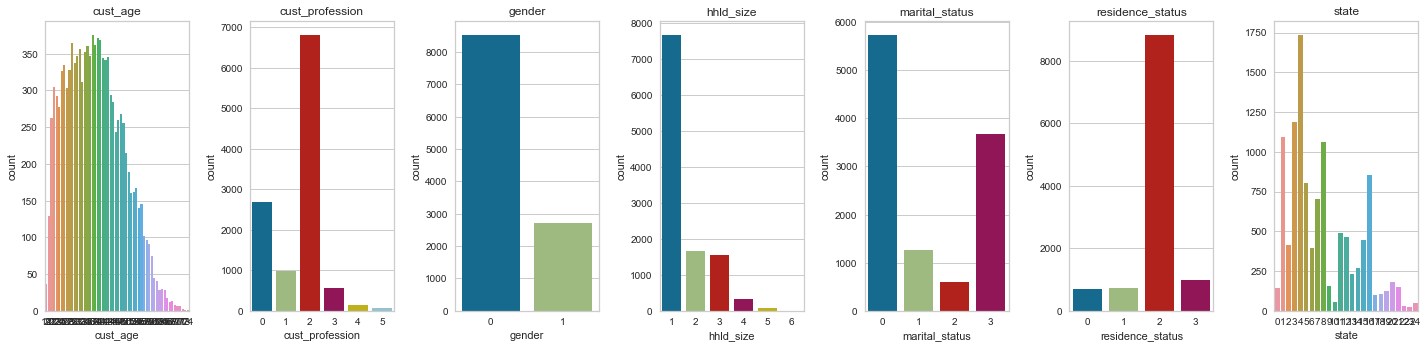

In [74]:
selected_features = ['cust_age', 'cust_profession', 'gender', 'hhld_size', 'marital_status',
       'residence_status', 'state']

# Set the figure size
plt.figure(figsize=(20, 5))

# Loop through the selected features and create a countplot for each one
for i, feature in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i+1)
    sns.countplot(x=feature, data=cluster5df)
    plt.title(feature)

# Adjust the spacing between the plots
plt.tight_layout()

# Show the plots
plt.show()